In [2]:
import pandas as pd
df = pd.read_csv('../data/processed_data/naukri_job_listings_cleaned.csv')

In [5]:
df.shape

(29432, 12)

In [4]:
df.columns

Index(['Job Title', 'Company Name', 'Experience Required', 'Salary',
       'Location', 'Description', 'Skills', 'Time Posted', 'Reviews',
       'TimeStamp', 'Min Salary', 'Max Salary'],
      dtype='object')

In [123]:
df.head(3)

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,TimeStamp,Min Salary,Max Salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Bengaluru, Chennai, Hybrid - Hyderabad",We have Virutal drive for this weekend Hurry u...,"['Net', 'Entity Framework', 'Core', 'Software'...",1 Day Ago,29139,2024-08-24 15:44:22.735493,0.0,0.0
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"['System Architecture', 'Backend', 'Troublesho...",1 Day Ago,89,2024-08-24 15:44:22.735493,0.0,0.0
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"['Data Structures', 'Rdbms', 'Json', 'Javascri...",1 Day Ago,450,2024-08-24 15:44:22.735493,0.0,0.0


1. Job titles having maximum postings - Catrgorical Data

In [124]:
def categorize_by_frequency(title):
    title = title.lower() 

    if 'lead' in title or 'lead software engineer' in title:
        return 'Lead Software Engineer'
    elif 'frontend' in title:
        return 'Frontend Engineer'
    elif 'backend' in title:
        return 'Backend Engineer'
    elif 'principal' in title:
        return 'Principal Software Engineer'
    elif 'senior' in title or 'sr' in title:
        return 'Senior Software Engineer'
    elif 'development' in title:
        return 'Software Development Engineer'
    elif 'full stack' in title:
        return 'Full Stack Engineer'
    elif '.net' in title:
        return '.Net Engineer'
    elif 'qa' in title or 'testing' in title:
        return 'QA/Testing Engineer'
    elif 'python' or 'java' or 'C++' in title:
        return 'Specialized Engineer'
    elif 'AWS' or 'Azure' in title:
        return 'Cloud Engineer'
    else:
        return 'Other'

df['Job Title Category'] = df['Job Title'].apply(categorize_by_frequency)
print(df['Job Title Category'].value_counts())


Job Title Category
Specialized Engineer             17856
Senior Software Engineer          5796
Lead Software Engineer            1964
Software Development Engineer     1877
Principal Software Engineer        498
Backend Engineer                   480
Full Stack Engineer                298
Frontend Engineer                  231
QA/Testing Engineer                219
.Net Engineer                      213
Name: count, dtype: int64


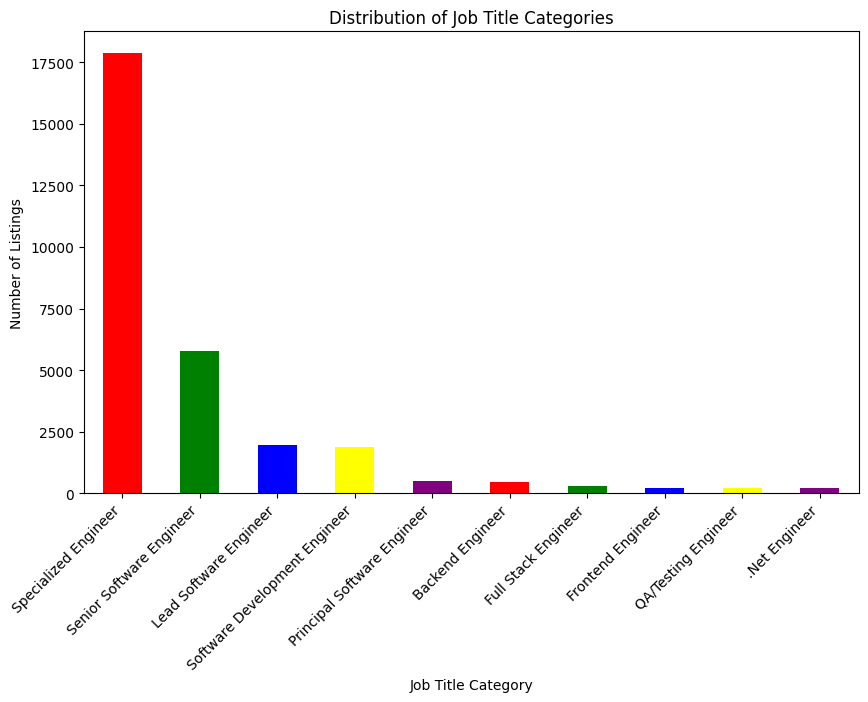

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Job Title Category'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])
plt.xlabel('Job Title Category')
plt.ylabel('Number of Listings')
plt.title('Distribution of Job Title Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

2. Companies having the highest job postings 

In [126]:
company_counts = df['Company Name'].value_counts()
print(company_counts.head(10))

Company Name
Accenture                     3697
Essenware                      518
Siemens                        428
Microsoft                      352
RGB Webtech                    238
IBM                            209
Leading Client                 179
The Job Factory                173
Walmart                        160
Qualcomm Technologies, Inc     131
Name: count, dtype: int64


Get Job Postings for a particular company - user input 

In [127]:
def get_jobs_by_company(df, company_name):
    """Get all job listings for a given company."""
    df['Company Name'] = df['Company Name'].str.title() 
    
    filtered_df = df[df['Company Name'] == company_name]
    return filtered_df

company_name_input = "Tech Mahindra"
jobs_for_company = get_jobs_by_company(df, company_name_input)
jobs_for_company

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,TimeStamp,Min Salary,Max Salary,Job Title Category
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Bengaluru, Chennai, Hybrid - Hyderabad",We have Virutal drive for this weekend Hurry u...,"['Net', 'Entity Framework', 'Core', 'Software'...",1 Day Ago,29139,2024-08-24 15:44:22.735493,0.0,0.00,Specialized Engineer
1130,Sr. Software Engineer (SAP fieldglass),Tech Mahindra,6-11 Yrs,10-14 Lacs PA,"Bengaluru, Pune",SAP FIELDGLASSJava with SQLTechno Functional R...,"['Fieldglass', 'Sr', 'Sap Fieldglass', 'Softwa...",10 Days Ago,29139,2024-08-15 15:44:22.740835,10.0,14.00,Senior Software Engineer
1131,Sr. Software Engineer (SAP PP),Tech Mahindra,1-5 Yrs,5-8 Lacs PA,"Bengaluru, Pune",SAP ABAP with SAP PPTechno Functional roleOnly...,"['Pp', 'Sap Abap', 'Sr', 'Software', 'Software...",10 Days Ago,29139,2024-08-15 15:44:22.740835,5.0,8.00,Senior Software Engineer
1792,Software Engineer (SAP GTS),Tech Mahindra,1-5 Yrs,5-8 Lacs PA,"Bengaluru, Pune",SAP ABAP with SAP GTSTechno Functional roleOnl...,"['Trade Services', 'Trade', 'Software Engineer...",10 Days Ago,29139,2024-08-15 15:44:22.742828,5.0,8.00,Specialized Engineer
6376,Senior Software Engineer,Tech Mahindra,5-10 Yrs,Not disclosed,Hyderabad,"Required: PriceFx . Modules:Price Analyzer, Pr...","['Groovy', 'Software', 'Price Builder', 'Git',...",22 Days Ago,29139,2024-08-03 15:44:22.764891,0.0,0.00,Senior Software Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24268,Urgent Hiring Myntra Customer service,Tech Mahindra,0-5 Yrs,2-2.75 Lacs PA,"Delhi / NCR, New Delhi, Noida",Urgent hiring for Myntra Customer care Under G...,"['Ites', 'Customer Service', 'Teleperformance'...",1 Day Ago,0,2024-08-24 15:44:22.807812,2.0,2.75,Specialized Engineer
24299,Tech Mahindra || Customer Service || Chat & Vo...,Tech Mahindra,0-5 Yrs,3-5 Lacs PA,"Chandigarh, Indore, Mohali",Resolving customer query over chat or voice Sa...,"['Aviation', 'Chat Support', 'Fresher Job', 'C...",1 Day Ago,0,2024-08-24 15:44:22.807812,3.0,5.00,Specialized Engineer
24303,Tech Mahindra || Customer Service || Chat & Vo...,Tech Mahindra,0-5 Yrs,3-5 Lacs PA,"Mumbai (All Areas), Mumbai Suburban, Navi Mumbai",Resolving customer query over chat or voice Sa...,"['Aviation', 'Chat Support', 'Fresher Job', 'C...",1 Day Ago,0,2024-08-24 15:44:22.807812,3.0,5.00,Specialized Engineer
24733,Customer Support Executive,Tech Mahindra,0-3 Yrs,2-2.75 Lacs PA,Noida,24*7 shifts for Male candidate and 7AM to 7PM ...,"['Communication Skills', 'Customer Support']",3 Days Ago,0,2024-08-22 15:44:22.808803,2.0,2.75,Specialized Engineer


Get Maximum and minimum salary data for a particualar company 

In [128]:
import pandas as pd

def get_salary_range_by_company(df, company_name):
    """Get the minimum and maximum salary for a given company."""
    df['Company Name'] = df['Company Name'].str.title() 
    
    filtered_df = df[df['Company Name'] == company_name]

    min_salary = filtered_df['Min Salary'].min()
    max_salary = filtered_df['Max Salary'].max()

    return min_salary, max_salary

company_name_input = "Tech Mahindra"
min_salary, max_salary = get_salary_range_by_company(df, company_name_input)
print(f"Maximum Salary: {max_salary}")

Maximum Salary: 25.0


Maximum salaries of companies having maximum reviews

In [129]:
df.columns

Index(['Job Title', 'Company Name', 'Experience Required', 'Salary',
       'Location', 'Description', 'Skills', 'Time Posted', 'Reviews',
       'TimeStamp', 'Min Salary', 'Max Salary', 'Job Title Category'],
      dtype='object')

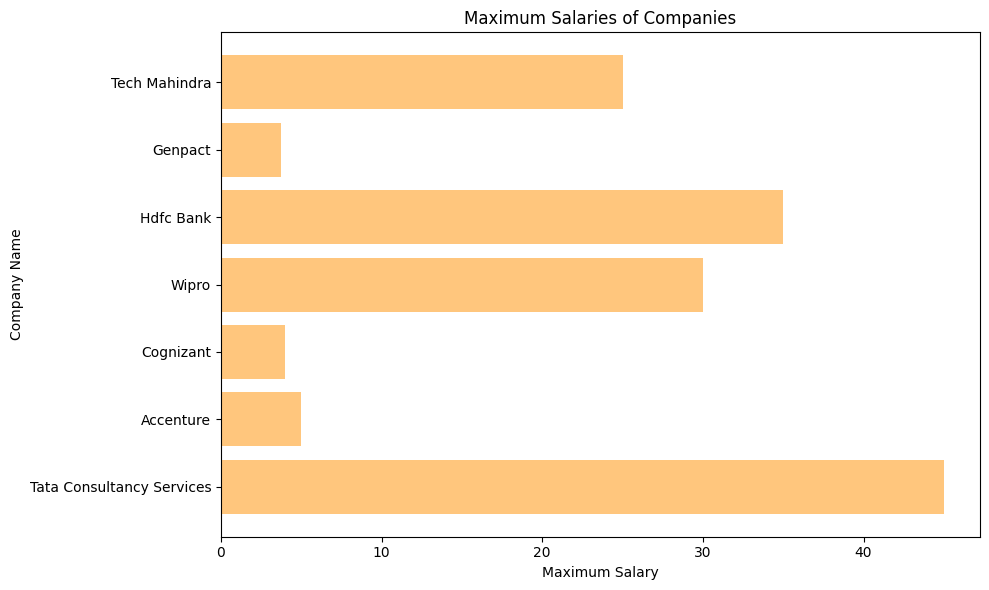

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

def get_max_salary_by_company(df, company_name):
    filtered_df = df[df['Company Name'] == company_name]
    return filtered_df['Max Salary'].max()

company_names = ['Tata Consultancy Services', 'Accenture', 'Cognizant', 'Wipro', 'Hdfc Bank', 'Genpact', 'Tech Mahindra']
max_salaries = [get_max_salary_by_company(df, company) for company in company_names]

plt.figure(figsize=(10,6))
plt.barh(company_names, max_salaries, color='#FFC67D')
plt.xlabel('Maximum Salary')
plt.ylabel('Company Name')
plt.title('Maximum Salaries of Companies')
plt.tight_layout()
plt.show()

Q. Companies having highest mean compensation 

In [131]:
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')

df['Min Salary'].replace('Not disclosed', pd.NA, inplace=True)
df['Max Salary'].replace('Not disclosed', pd.NA, inplace=True)

df['Average Salary'] = df[['Min Salary', 'Max Salary']].mean(axis=1)
average_salaries = df.groupby('Company Name')['Average Salary'].mean()
top_companies = average_salaries.nlargest(10)
print(top_companies)

Company Name
Himanshi Mehra                                       87.5
Angel One                                            70.0
Axtria                                               70.0
Health Care Job Placement                            62.5
Cosmogence                                           60.0
Leading Technology Platforms And Services Company    57.5
Mv Placements                                        55.0
Verve Group                                          52.5
Multi-Speciality Hospital In Rajasthan               50.0
Airties India                                        47.5
Name: Average Salary, dtype: float64


In [132]:
df.head()

,Job Title,Company Name,Experience Required,Salary,Location,Description,Skills,Time Posted,Reviews,TimeStamp,Min Salary,Max Salary,Job Title Category,Average Salary
0,Software Engineer - Dot Net Core,Tech Mahindra,5-8 Yrs,Not disclosed,"Bengaluru, Chennai, Hybrid - Hyderabad",We have Virutal drive for this weekend Hurry u...,"['Net', 'Entity Framework', 'Core', 'Software'...",1 Day Ago,29139,2024-08-24 15:44:22.735493,0.0,0.0,Specialized Engineer,0.0
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising,2-6 Yrs,Not disclosed,Bengaluru,Contributing to team and organizational improv...,"['System Architecture', 'Backend', 'Troublesho...",1 Day Ago,89,2024-08-24 15:44:22.735493,0.0,0.0,Senior Software Engineer,0.0
2,Software Engineer (.Net Fullstack),Blue Yonder,3-6 Yrs,Not disclosed,Hyderabad,Deliver on these promises through self-healing...,"['Data Structures', 'Rdbms', 'Json', 'Javascri...",1 Day Ago,450,2024-08-24 15:44:22.735493,0.0,0.0,.Net Engineer,0.0
3,Lead Software Engineer - Java Full Stack,Eze Software Group,5-8 Yrs,Not disclosed,"Hyderabad, Mumbai, Pune, Thane",Hands on experience with various java / web te...,"['Rdbms', 'Mvc', 'Healthcare', 'Tdd', 'Mutual ...",1 Day Ago,37,2024-08-24 15:44:22.735493,0.0,0.0,Lead Software Engineer,0.0
4,Sr. Software Engineer - Java Microservices,Eq Technologic,3-5 Yrs,Not disclosed,"Bengaluru, Chennai, Hyderabad, Kolkata, Mumbai...",Developing and maintaining eQ's products using...,"['Data Structures', 'Research', 'Test Cases', ...",1 Day Ago,71,2024-08-24 15:44:22.735493,0.0,0.0,Senior Software Engineer,0.0


3. Which location has the maximum number of job postings 

In [133]:
def get_location(df):
    df_new=pd.DataFrame()
    for index, row in df.iterrows():
        for loc in row['Location'].split(','):
            loc_df = pd.DataFrame([loc])
            df_new = pd.concat([df_new,loc_df],ignore_index=True)
    return df_new    

In [134]:
Location_df = get_location(df)
Location_df.columns = ['Location']


In [135]:
Location_df.groupby('Location',sort=True)['Location'].count().sort_values(ascending=False)[0:30]

Location
Bengaluru              9510
Hyderabad              2593
Pune                   2420
Chennai                1976
Mumbai                 1394
 Pune                  1266
 Hyderabad             1178
 Chennai               1123
Noida                  1076
 Mumbai                1041
 New Delhi              981
Gurugram                949
 Kolkata                890
Remote                  789
Ahmedabad               634
Chandigarh              413
Kolkata                 392
Delhi / NCR             366
 Noida                  365
New Delhi               354
 Navi Mumbai            328
 Gurugram               313
 Thane                  278
Indore                  271
no data available       268
Coimbatore              255
Mumbai (All Areas)      241
Kochi                   235
Jaipur                  212
 Mumbai (All Areas)     190
Name: Location, dtype: int64

In [136]:
#categorize location data

from re import search
def get_comman_location(x):
    x = x.replace(",", " /")
    if (search('bengaluru', x.lower()) or search('bangalore', x.lower())):
        return 'Bengaluru'
    elif (search('ahmedabad', x.lower())):
        return 'Ahmedabad'
    elif (search('chennai', x.lower())):
        return 'Chennai'
    elif (search('coimbatore', x.lower())):
        return 'Coimbatore'
    elif (search('delhi', x.lower()) or search('noida', x.lower()) or search('gurgaon', x.lower())):
        return 'Delhi NCR'
    elif (search('hyderabad', x.lower())):
        return 'Hyderabad'
    elif (search('kolkata', x.lower())):
        return 'Kolkata'
    elif (search('mumbai', x.lower())):
        return 'Mumbai'
    elif (search('Pune', x.lower())):
        return 'pune'
    elif (search('other', x.lower())):
        return 'Others'
    else:
        return x.strip()

Location_df['New_Location']=Location_df['Location'].apply(get_comman_location)
Location_df.groupby('New_Location',sort=True)['New_Location'].count().sort_values(ascending=False)[0:15]

New_Location
Bengaluru     10394
Hyderabad      4080
Delhi NCR      3850
Pune           3686
Mumbai         3632
Chennai        3324
Kolkata        1343
Gurugram       1262
Remote          789
Ahmedabad       662
Chandigarh      432
Coimbatore      350
Thane           339
Indore          331
Jaipur          283
Name: New_Location, dtype: int64

In [137]:
top_locations = Location_df['New_Location'].value_counts().head(10)

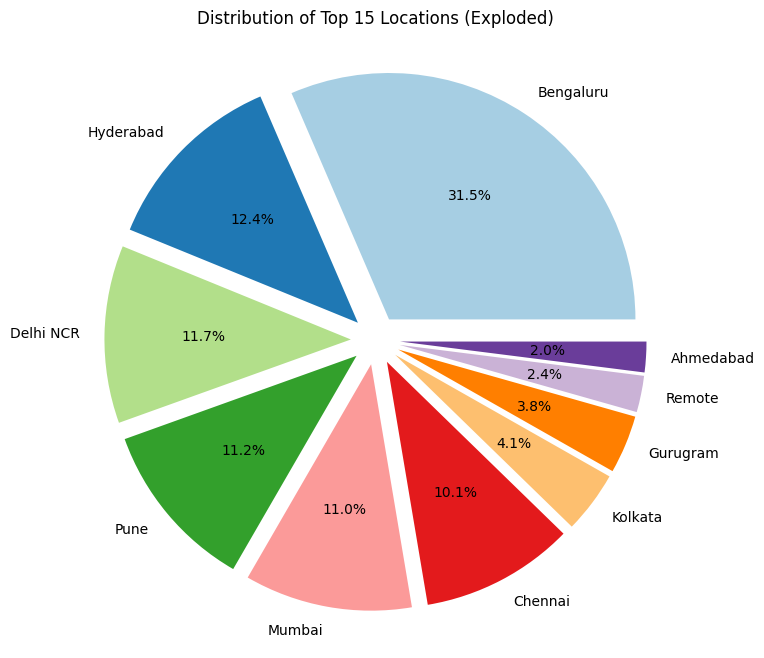

In [138]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.pie(top_locations, 
        labels=top_locations.index, 
        autopct='%1.1f%%', 
        colors=plt.cm.Paired(range(len(top_locations))),
        explode=[0.1] * len(top_locations))  # Explode all slices
plt.title('Distribution of Top 15 Locations (Exploded)')
plt.show()

2. What is the experience range for highest job Postings   

In [139]:
df.groupby('Experience Required',sort=True)['Experience Required'].count()[0:30]

Experience Required
0 Yrs         885
0-1 Yrs      2246
0-10 Yrs       12
0-15 Yrs        1
0-19 Yrs        1
0-2 Yrs      2090
0-3 Yrs      1522
0-4 Yrs       820
0-5 Yrs      1935
0-6 Yrs        51
0-7 Yrs        14
0-8 Yrs        25
0-9 Yrs         3
1-10 Yrs        3
1-12 Yrs        1
1-2 Yrs       165
1-3 Yrs       449
1-4 Yrs       415
1-5 Yrs       247
1-6 Yrs       158
1-7 Yrs        14
1-8 Yrs         4
1-9 Yrs         3
10-11 Yrs       9
10-12 Yrs     198
10-13 Yrs      16
10-14 Yrs      27
10-15 Yrs      94
10-16 Yrs       3
10-17 Yrs       4
Name: Experience Required, dtype: int64

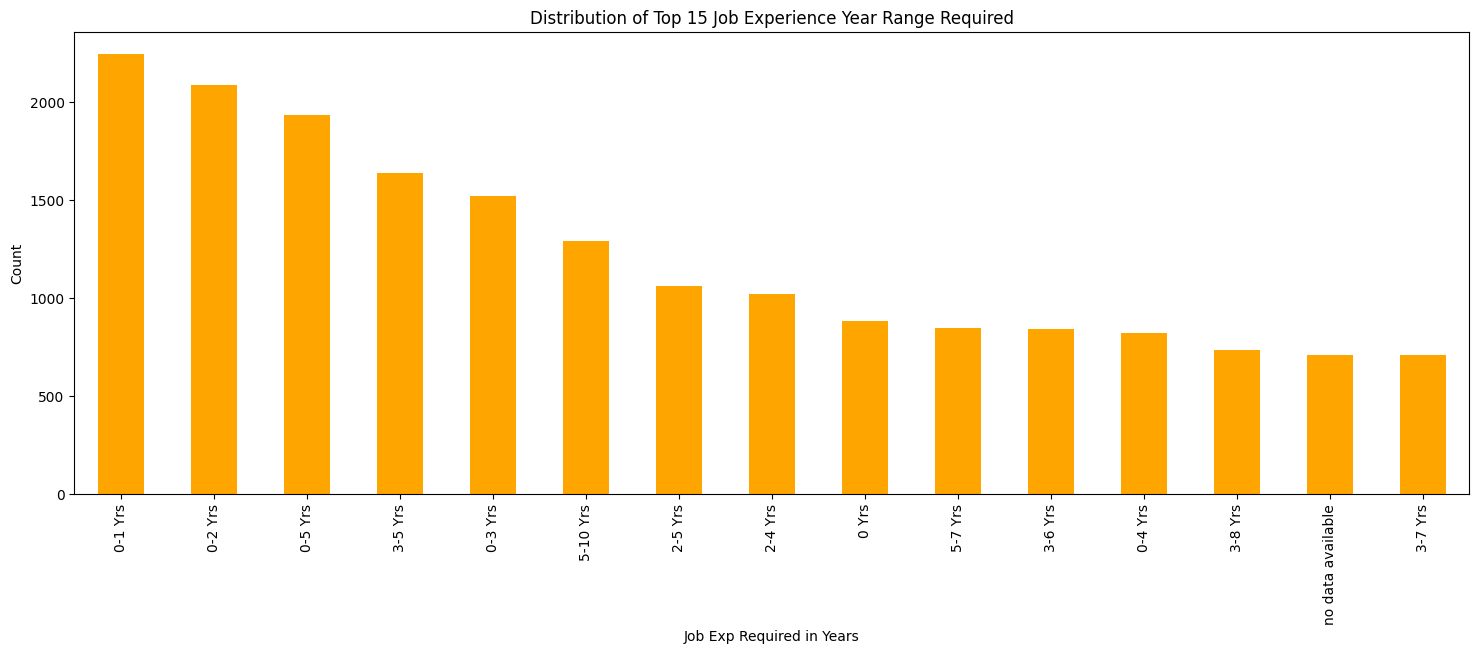

In [140]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('Experience Required',sort=True)['Experience Required'].count().sort_values(ascending=False)[0:15].plot.bar(color="orange")
plt.xlabel('Job Exp Required in Years')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Job Experience Year Range Required')
plt.show()

3. Get all the jobs having exp range wiht my experience
Get all jobs with your yoe 

In [141]:
import pandas as pd

def parse_experience(exp_range):
    try:
        min_exp, max_exp = exp_range.split('-')
        min_exp = int(min_exp.strip().split()[0])
        max_exp = int(max_exp.strip().split()[0]) if max_exp.strip() else None
        return min_exp, max_exp
    except (ValueError, IndexError):
        return None, None

def filter_jobs_by_experience(df, exp_input):
    min_exp_input = exp_input
    
    def is_within_range(exp):
        exp_min, exp_max = parse_experience(exp)
        if exp_min is None:  
            return False
        if exp_max is None: 
            return exp_min < min_exp_input
        return exp_min <= min_exp_input <= exp_max
    
    return df[df['Experience Required'].apply(is_within_range)]

exp_input = 4
filtered_jobs = filter_jobs_by_experience(df, exp_input)
filtered_jobs[['Job Title', 'Company Name']].head(5)


,Job Title,Company Name
1,"Software Engineer, Senior Fullstack",Affinity Global Advertising
2,Software Engineer (.Net Fullstack),Blue Yonder
4,Sr. Software Engineer - Java Microservices,Eq Technologic
5,Dot Net - Sr. Software Engineer,Nextgen Invent
7,Software Engineer -Dot Net & Angular,Bar Code India


Get comapnies with your Yoe having max salary 

In [142]:
filtered_df = filter_jobs_by_experience(df, 5)
company_salary_df = filtered_df.groupby('Company Name')['Max Salary'].max().reset_index()
sorted_company_salary_df = company_salary_df.sort_values(by='Max Salary', ascending=False)
sorted_company_salary_df.head(10)

,Company Name,Max Salary
1563,Himanshi Mehra,95.0
1538,Health Care Job Placement,85.0
3665,Uplers,70.0
2338,Mv Placements,65.0
310,Arista Networks,60.0
156,Airties India,60.0
2328,Multi-Speciality Hospital In Rajasthan,60.0
1393,Gameskraft,60.0
3242,Squarepoint Capital,55.0
1839,Isha Immigration,50.0


get max and min salary of companies 

In [143]:
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')

salary_df = df[(df['Min Salary'] > 0) & (df['Max Salary'] > 0)]

company_salary_stats = salary_df.groupby('Company Name').agg({
    'Min Salary': 'min',
    'Max Salary': 'max'
})
company_salary_stats

,Min Salary,Max Salary
Company Name,,
-,1.00,3.25
.,1.00,2.50
24 7 Ai,1.25,4.25
24/7.Ai,2.50,4.00
2Coms,1.00,3.00
...,...,...
Zuci Systems India,8.00,18.00
Zydus Lifesciences,1.00,3.00
Zymr Systems,15.00,30.00


In [144]:
import seaborn as sns

In [145]:
df.columns

Index(['Job Title', 'Company Name', 'Experience Required', 'Salary',
       'Location', 'Description', 'Skills', 'Time Posted', 'Reviews',
       'TimeStamp', 'Min Salary', 'Max Salary', 'Job Title Category',
       'Average Salary'],
      dtype='object')

C:\Users\sneha.gupta\AppData\Local\Temp\ipykernel_27176\2638303868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_salary_stats_sorted, y='Company Name', x='Salary_Difference', palette='viridis')


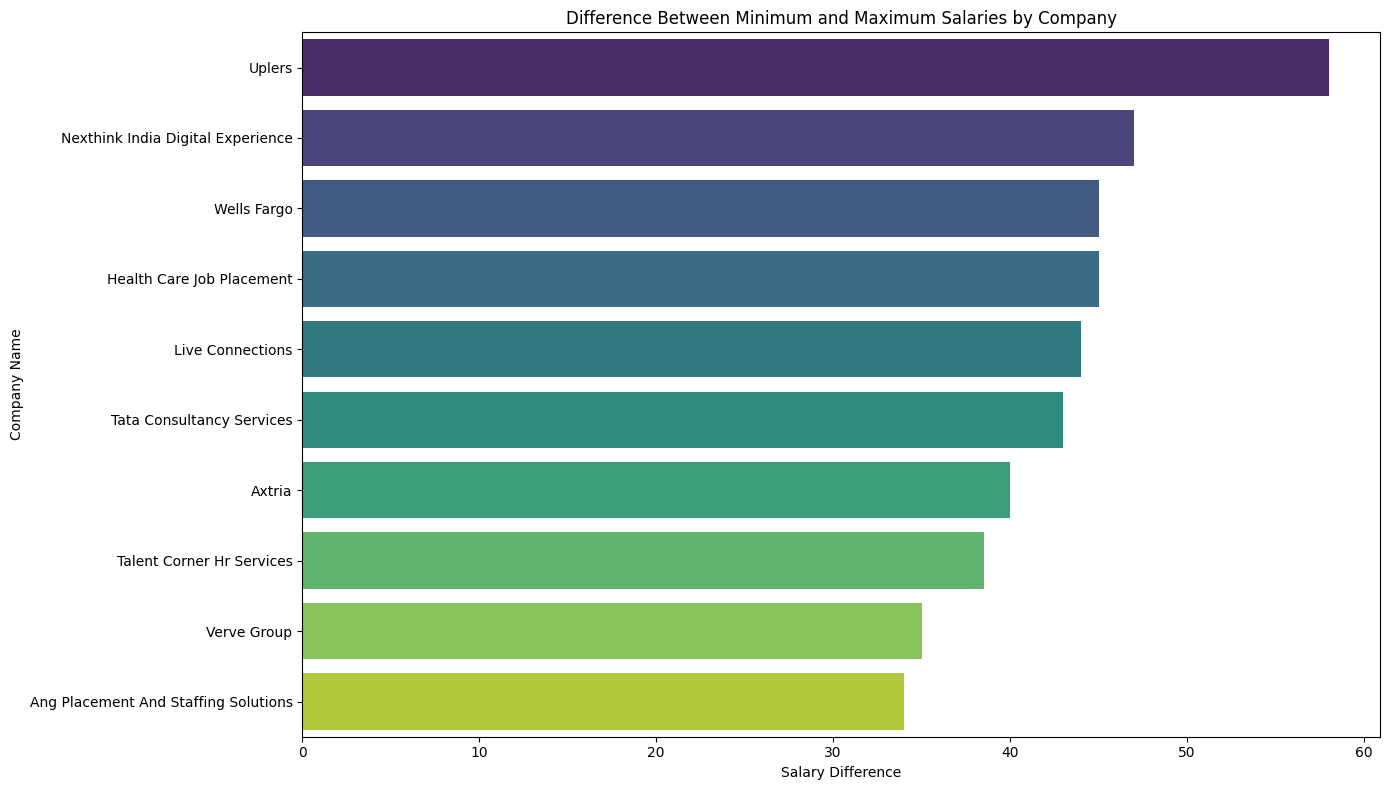

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')

salary_df = df[(df['Min Salary'] > 0) & (df['Max Salary'] > 0)]

company_salary_stats = salary_df.groupby('Company Name').agg({
    'Min Salary': 'min',
    'Max Salary': 'max'
}).reset_index()

company_salary_stats['Salary_Difference'] = company_salary_stats['Max Salary'] - company_salary_stats['Min Salary']

company_salary_stats_sorted = company_salary_stats.sort_values(by='Salary_Difference', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=company_salary_stats_sorted, y='Company Name', x='Salary_Difference', palette='viridis')

plt.ylabel('Company Name')
plt.xlabel('Salary Difference')
plt.title('Difference Between Minimum and Maximum Salaries by Company')

plt.tight_layout()
plt.show()


Companies and their average salaries

In [147]:
import pandas as pd

salary_df = df[(df['Min Salary'] > 0) & (df['Max Salary'] > 0)]

salary_df['Average Salary'] = (salary_df['Min Salary'] + salary_df['Max Salary']) / 2

company_avg_salary = salary_df.groupby('Company Name')['Average Salary'].mean().reset_index()
company_avg_salary

C:\Users\sneha.gupta\AppData\Local\Temp\ipykernel_27176\1436124432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df['Average Salary'] = (salary_df['Min Salary'] + salary_df['Max Salary']) / 2


,Company Name,Average Salary
0,-,2.187500
1,.,1.750000
2,24 7 Ai,2.835938
3,24/7.Ai,3.250000
4,2Coms,1.916667
...,...,...
1842,Zuci Systems India,13.000000
1843,Zydus Lifesciences,2.000000
1844,Zymr Systems,22.500000
1845,Zynga,27.000000


What is the average salary provided by all companies based on the avg of min and max salaries

In [148]:
company_avg_salary['Average Salary'].mean()

6.319364821269647

Time Posted Data does not maintain the history. SInce two days from now this data will be outdated and "Jut Now" Postings will be a history, to resolve this we have timestamp for accuate time. But this just now data can be used on fresh data or newly extracted data

TimeStamp
2024-07-01    15934
2024-08-01    13067
2024-09-01       51
2024-10-01      353
Freq: MS, dtype: int64


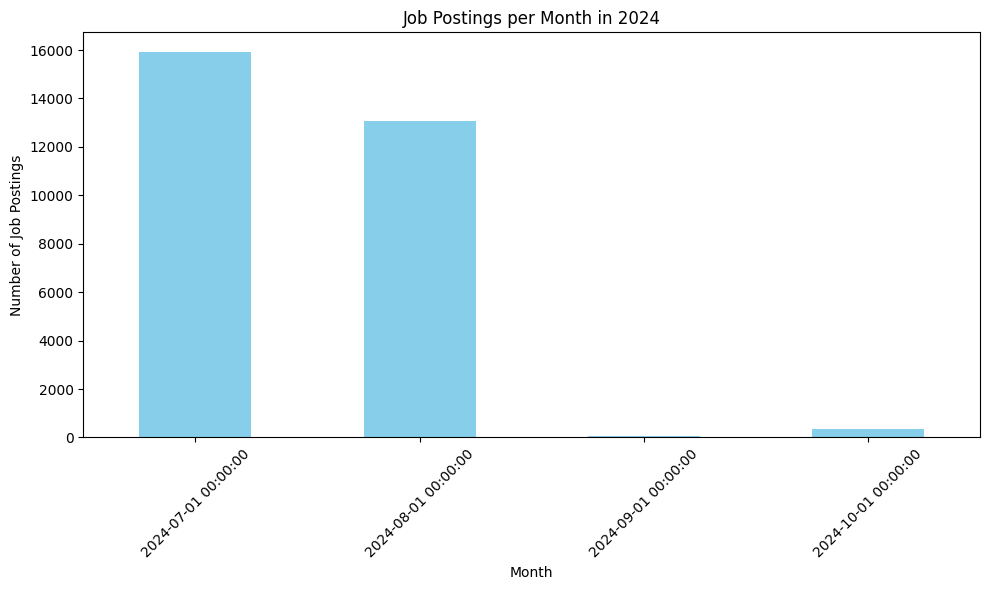

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], errors='coerce')
df_2024 = df[df['TimeStamp'].dt.year == 2024]
jobs_per_month = df_2024.groupby(df_2024['TimeStamp'].dt.to_period('M')).size()
jobs_per_month.index = jobs_per_month.index.to_timestamp()

print(jobs_per_month)

plt.figure(figsize=(10, 6))
jobs_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings per Month in 2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Job Listings Per month and day

In [150]:
month_counts = df['TimeStamp'].dt.strftime('%B %Y').value_counts().sort_index()
print(month_counts)


TimeStamp
August 2024       13067
January 2025         16
July 2024         15934
October 2024        353
September 2024       51
Name: count, dtype: int64


This data will be accurate one year from now

YearMonth       0
Job Postings    0
dtype: int64


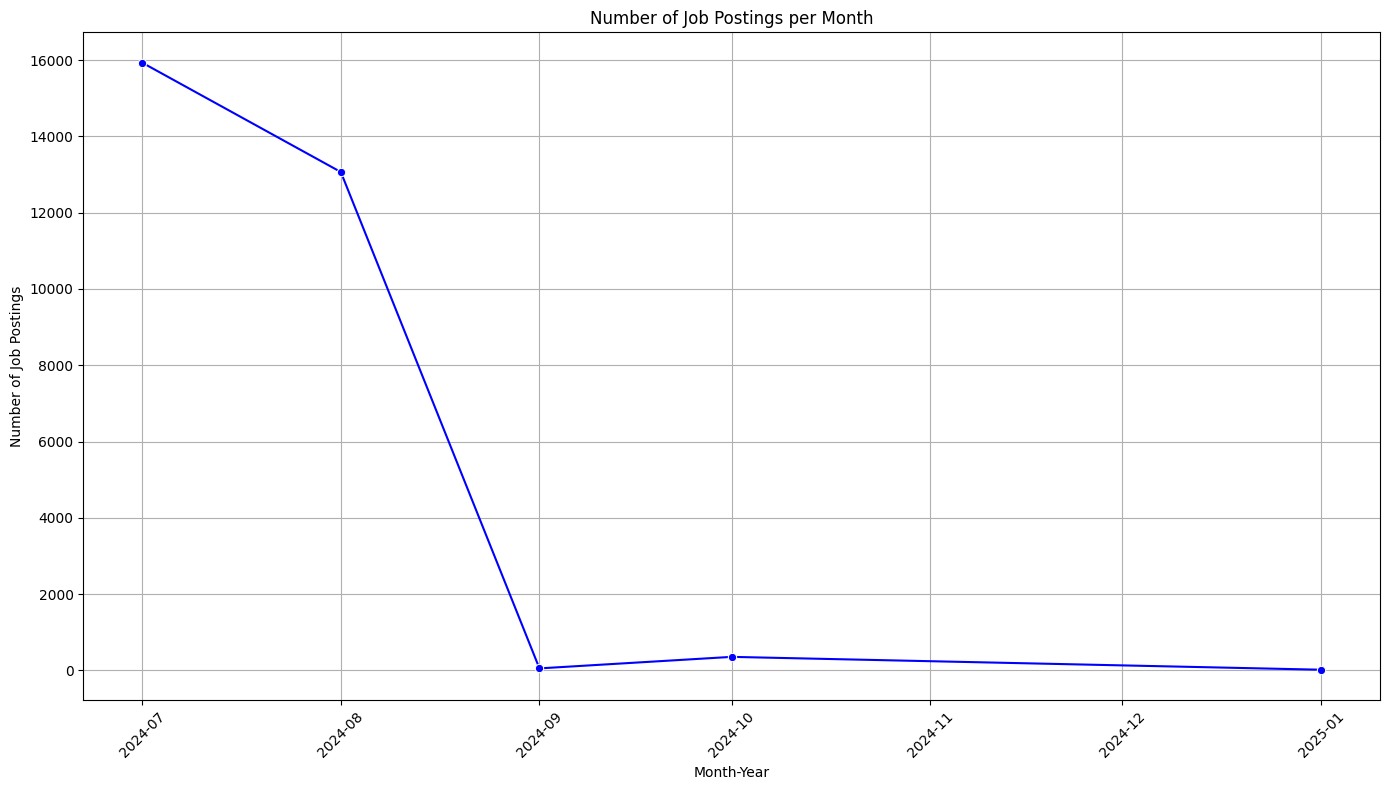

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], errors='coerce')

df['YearMonth'] = df['TimeStamp'].dt.to_period('M')

jobs_per_month = df.groupby('YearMonth').size()
jobs_per_month_df = jobs_per_month.reset_index(name='Job Postings')
jobs_per_month_df['YearMonth'] = jobs_per_month_df['YearMonth'].apply(lambda x: x.to_timestamp())
jobs_per_month_df['Job Postings'] = pd.to_numeric(jobs_per_month_df['Job Postings'], errors='coerce')
print(jobs_per_month_df.isna().sum())

plt.figure(figsize=(14, 8))
sns.lineplot(data=jobs_per_month_df, x='YearMonth', y='Job Postings', marker='o', color='b')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Number of Job Postings')
plt.title('Number of Job Postings per Month')
plt.grid(True)
plt.tight_layout()

plt.show()


before july 2024, data is accumulated since just now is converted to particular time stamp in current scenario, so one year from now willl have data for all the month repsectively which would accurately show the trends of hiring or job postings variations over months.

Time Posted contains categorical data over a month, last 30 days which is july 26 so all the postings before july 26 are marked under july 26 according to my proofing logic. 

Remove outlier considering july 26 and before is outlier 

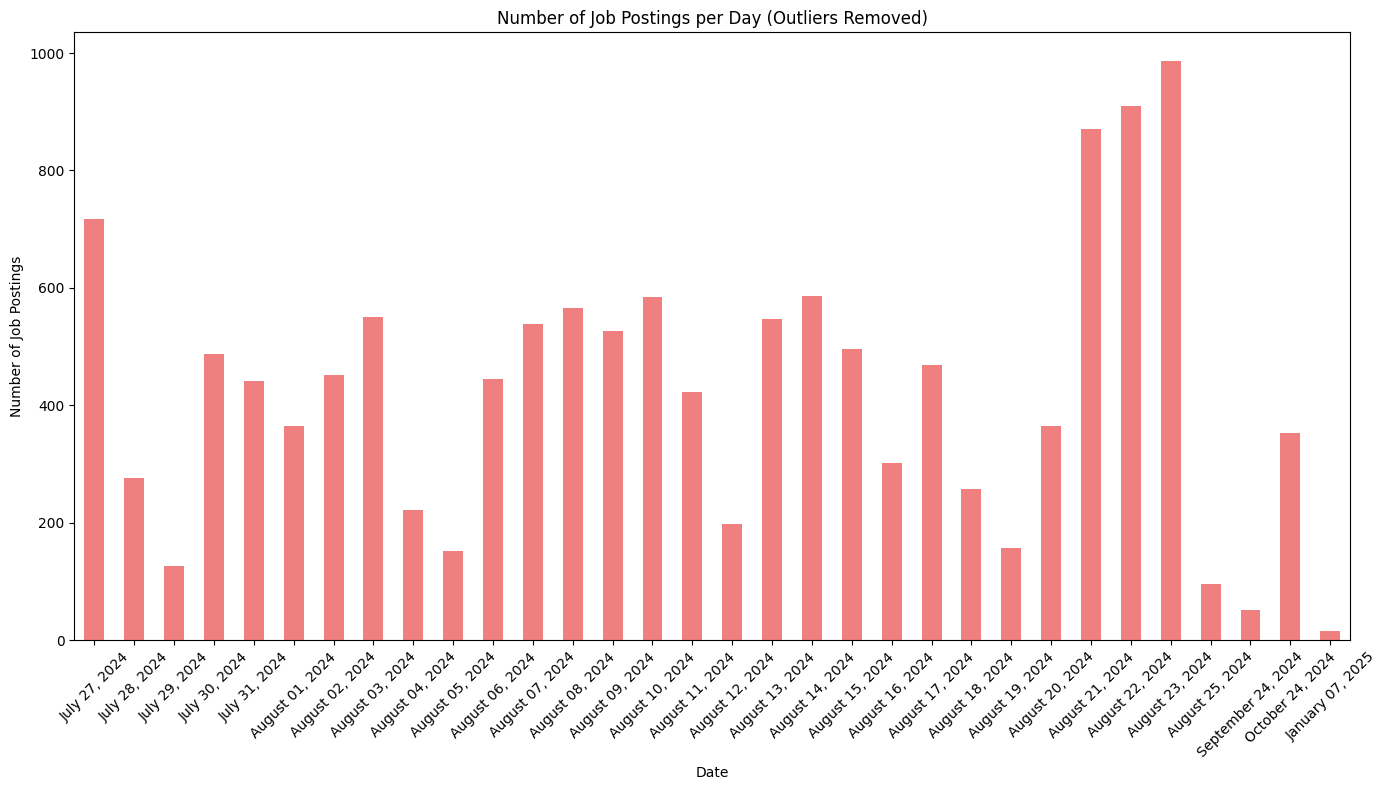

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], errors='coerce')
df['Date'] = df['TimeStamp'].dt.date
jobs_per_day = df.groupby('Date').size()
jobs_per_day.index = pd.to_datetime(jobs_per_day.index).strftime('%B %d, %Y')
Q1 = jobs_per_day.quantile(0.25)
Q3 = jobs_per_day.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
jobs_per_day_filtered = jobs_per_day[(jobs_per_day >= lower_bound) & (jobs_per_day <= upper_bound)]

jobs_per_day_filtered.index = pd.to_datetime(jobs_per_day_filtered.index).strftime('%B %d, %Y')

plt.figure(figsize=(14, 8))
jobs_per_day_filtered.plot(kind='bar', color='lightcoral')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Number of Job Postings per Day (Outliers Removed)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Get number of job postings by month on each date

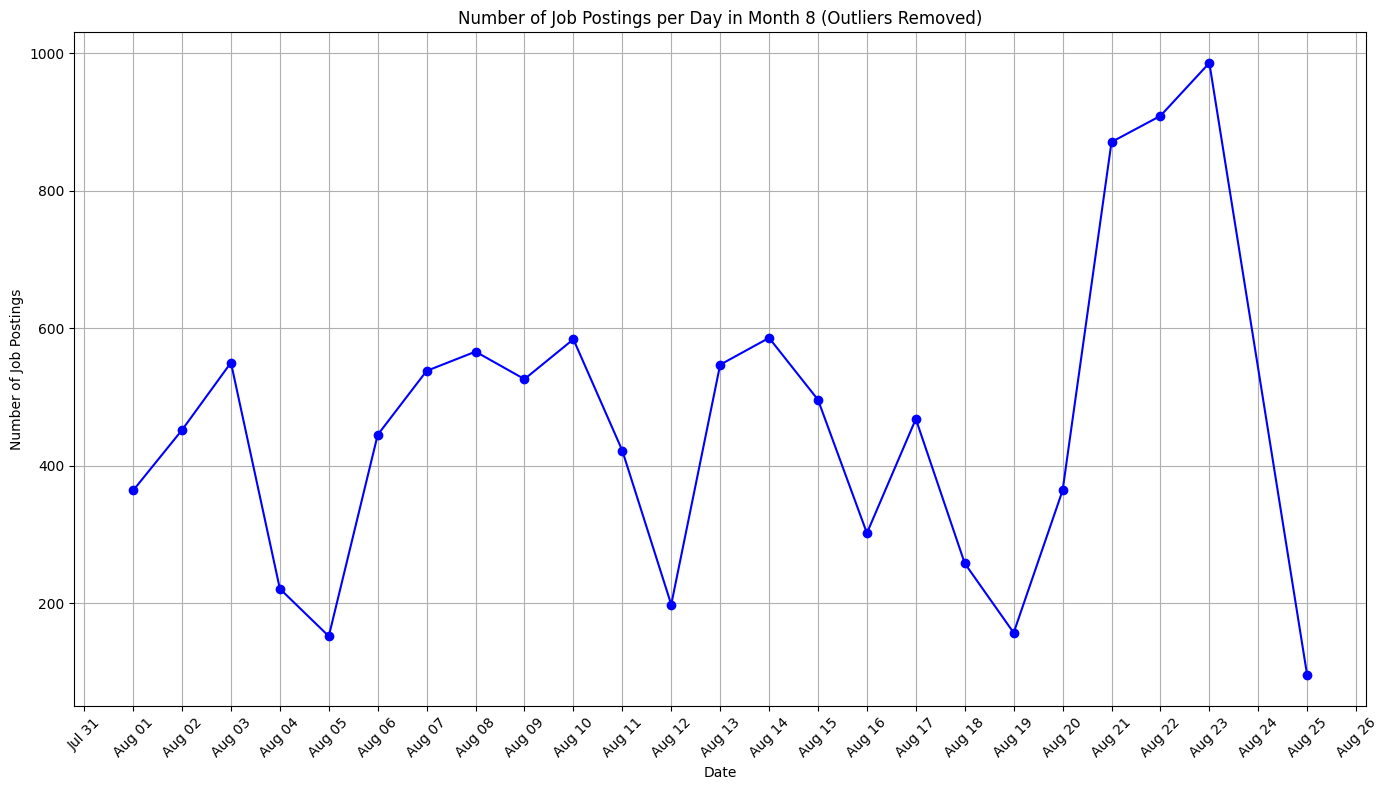

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], errors='coerce')

df['Date'] = df['TimeStamp'].dt.date

jobs_per_day = df.groupby('Date').size()

Q1 = jobs_per_day.quantile(0.25)
Q3 = jobs_per_day.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

jobs_per_day_filtered = jobs_per_day[(jobs_per_day >= lower_bound) & (jobs_per_day <= upper_bound)]
jobs_per_day_filtered.index = pd.to_datetime(jobs_per_day_filtered.index)

def plot_jobs_for_month(month_number):
    month_data = jobs_per_day_filtered[jobs_per_day_filtered.index.month == month_number]
    
    if month_data.empty:
        print(f"No data available for month number {month_number}.")
        return
    
    plt.figure(figsize=(14, 8))
    plt.plot(month_data.index, month_data, marker='o', linestyle='-', color='b')

    plt.xlabel('Date')
    plt.ylabel('Number of Job Postings')
    plt.title(f'Number of Job Postings per Day in Month {month_number} (Outliers Removed)')
    plt.grid(True)

    date_format = mdates.DateFormatter('%b %d')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

try:
    month_number = int(input("Enter the month number (1-12): "))
    if 1 <= month_number <= 12:
        plot_jobs_for_month(month_number)
    else:
        print("Invalid month number. Please enter a number between 1 and 12.")
except ValueError:
    print("Invalid input. Please enter a numeric value for the month number.")


Date with highest number of job postings before removing the outlier 

In [154]:
import pandas as pd

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], errors='coerce')
df['Date'] = df['TimeStamp'].dt.date
jobs_per_day = df.groupby('Date').size()

max_date = jobs_per_day.idxmax()
max_count = jobs_per_day.max()

print(f"Date with the highest number of job postings: {max_date.strftime('%B %d, %Y')}")
print(f"Number of job postings: {max_count}")

Date with the highest number of job postings: July 26, 2024
Number of job postings: 13886


date with maximum job postings after removing the outlier 

In [155]:
import pandas as pd

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], errors='coerce')
df['Date'] = df['TimeStamp'].dt.date
jobs_per_day = df.groupby('Date').size()
Q1 = jobs_per_day.quantile(0.25)
Q3 = jobs_per_day.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

jobs_per_day_filtered = jobs_per_day[(jobs_per_day >= lower_bound) & (jobs_per_day <= upper_bound)]

max_date_filtered = jobs_per_day_filtered.idxmax()
max_count_filtered = jobs_per_day_filtered.max()

print(f"Date with the highest number of job postings (after removing outliers): {max_date_filtered.strftime('%B %d, %Y')}")
print(f"Number of job postings: {max_count_filtered}")


Date with the highest number of job postings (after removing outliers): August 23, 2024
Number of job postings: 986


In [156]:
import pandas as pd
from datetime import datetime

def get_job_postings_for_date(df, date_str):
    try:
        date_obj = datetime.strptime(date_str, '%d %B %Y').date()
        
        df['Date'] = df['TimeStamp'].dt.date
        jobs_per_day = df.groupby('Date').size()

        if date_obj in jobs_per_day.index:
            return jobs_per_day[date_obj]
        else:
            return "No job postings available for this date."

    except ValueError:
        return "Invalid date format. Please use 'DD Month YYYY' format."

date_input = input("Enter the date (e.g., 24 January 2024): ")
num_postings = get_job_postings_for_date(df, date_input)
print(f"Number of job postings: {num_postings}")



Number of job postings: 95


Correlation between Min Experience and Min Salary (filtered): 0.7692515462844041
Correlation between Max Experience and Max Salary (filtered): 0.6992164728280604


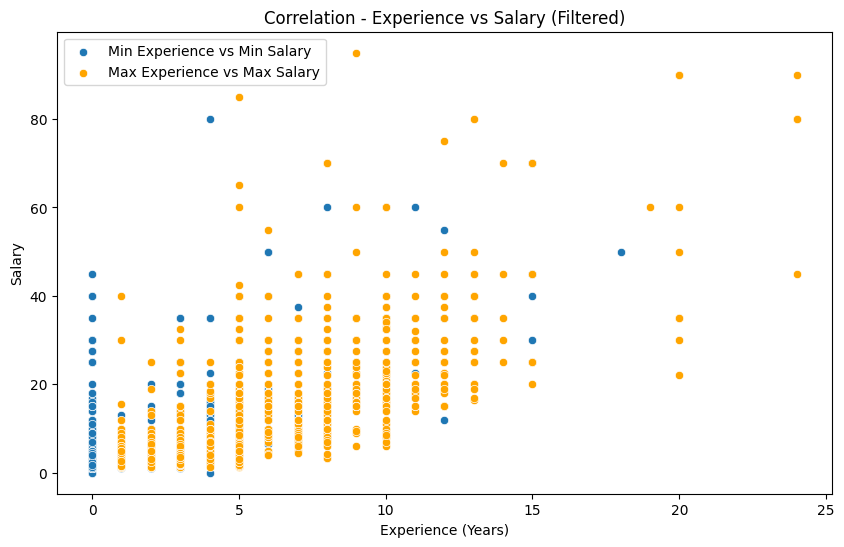

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')

df['Experience_Min'] = df['Experience Required'].str.extract(r'(\d+)-\d+').astype(float)
df['Experience_Max'] = df['Experience Required'].str.extract(r'\d+-(\d+)').astype(float)

filtered_df = df[df['Max Salary'] > 0]

correlation_min = filtered_df[['Experience_Min', 'Min Salary']].corr().iloc[0, 1]
correlation_max = filtered_df[['Experience_Max', 'Max Salary']].corr().iloc[0, 1]

print(f"Correlation between Min Experience and Min Salary (filtered): {correlation_min}")
print(f"Correlation between Max Experience and Max Salary (filtered): {correlation_max}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience_Min', y='Min Salary', data=filtered_df, label='Min Experience vs Min Salary')
sns.scatterplot(x='Experience_Max', y='Max Salary', data=filtered_df, label='Max Experience vs Max Salary', color='orange')
plt.title('Correlation - Experience vs Salary (Filtered)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.legend()
plt.show()


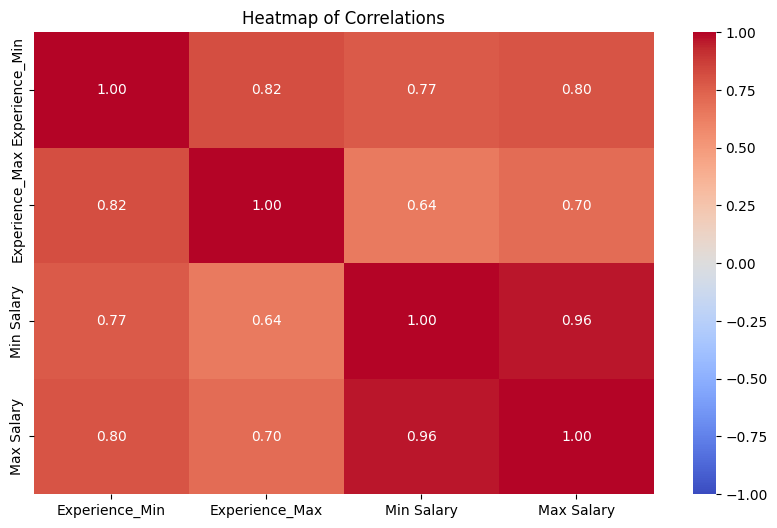

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = filtered_df[['Experience_Min', 'Experience_Max', 'Min Salary', 'Max Salary']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations')
plt.show()

Regression Plot: Demonstrates the relationship and fit line between experience and salary.

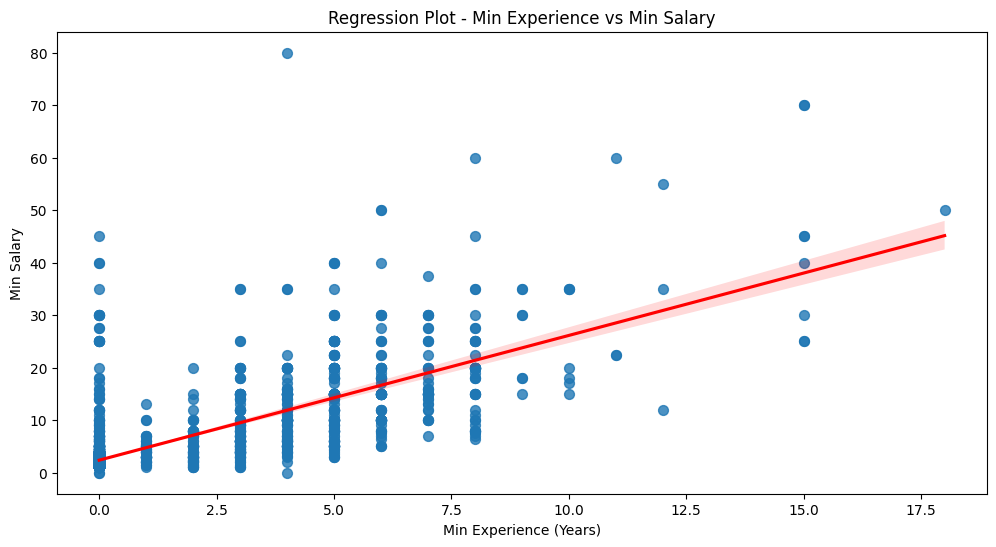

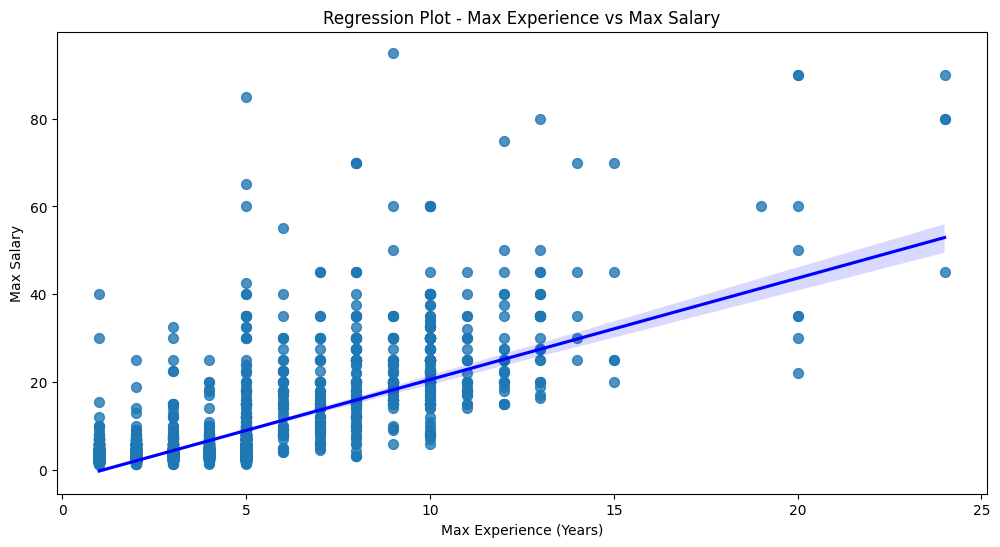

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(x='Experience_Min', y='Min Salary', data=filtered_df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Regression Plot - Min Experience vs Min Salary')
plt.xlabel('Min Experience (Years)')
plt.ylabel('Min Salary')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='Experience_Max', y='Max Salary', data=filtered_df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Regression Plot - Max Experience vs Max Salary')
plt.xlabel('Max Experience (Years)')
plt.ylabel('Max Salary')
plt.show()


c:\Users\sneha.gupta\Crash_course\Naukri_scrapper_analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


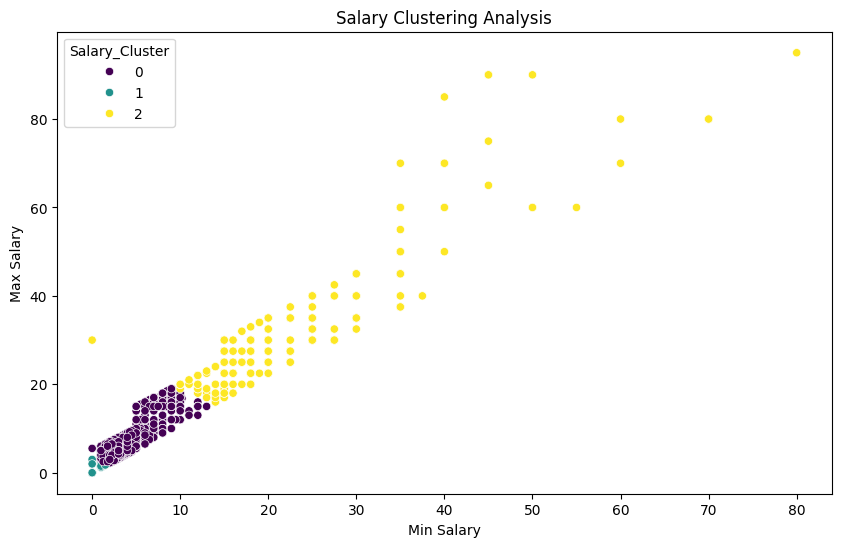

In [160]:
import scipy as sklearn
from sklearn.cluster import KMeans

df_cluster = df.dropna(subset=['Min Salary', 'Max Salary'])

X = df_cluster[['Min Salary', 'Max Salary']]

kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['Salary_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min Salary', y='Max Salary', hue='Salary_Cluster', data=df_cluster, palette='viridis')
plt.title('Salary Clustering Analysis')
plt.xlabel('Min Salary')
plt.ylabel('Max Salary')
plt.show()


Company Skills Analysis

In [161]:
import pandas as pd
from collections import Counter

def analyze_skills(df):
    df['Skills'] = df['Skills'].astype(str)
    
    def clean_skills(skill_str):
        cleaned = skill_str.strip("[]'").split(',')
        return [skill.strip().lower() for skill in cleaned if skill.strip()]
    
    skills_df = df['Skills'].apply(clean_skills)
    
    all_skills = [skill for sublist in skills_df for skill in sublist]
    skill_counts = Counter(all_skills)
    
    skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
    return skill_df

skill_df = analyze_skills(df)
print(skill_df.head(10))

                      Skill  Count
19             'javascript'   3943
81                      'c'   3325
72                  'agile'   2841
14                 'coding'   2525
79   'software engineering'   2378
29                   'html'   2109
21              'debugging'   2014
126                   'css'   1946
34                  'mysql'   1829
116  'software development'   1788


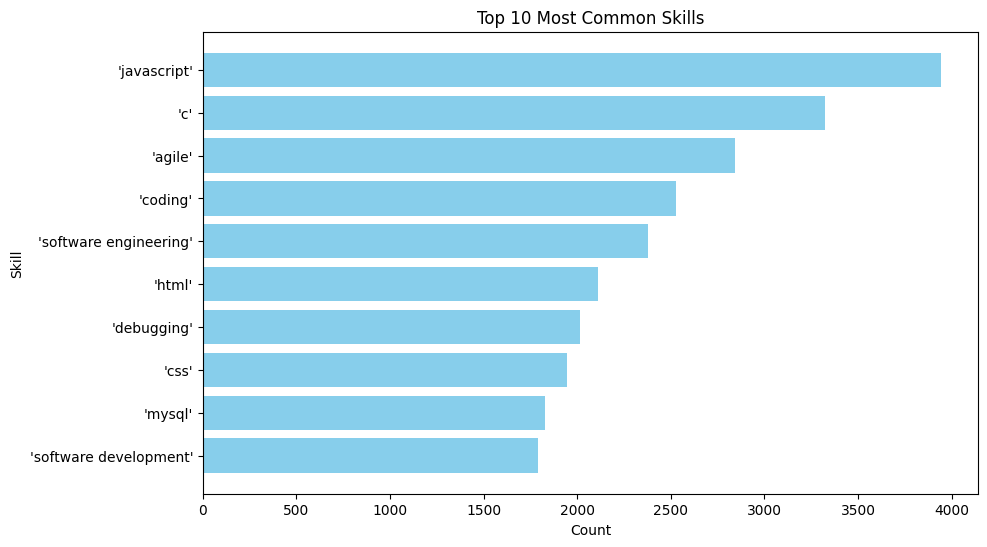

In [162]:
import matplotlib.pyplot as plt

def plot_top_skills(skill_df, top_n=10):
    top_skills = skill_df.head(top_n)
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_skills['Skill'], top_skills['Count'], color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.title(f'Top {top_n} Most Common Skills')
    plt.gca().invert_yaxis()  
    plt.show()

plot_top_skills(skill_df)


<Axes: >

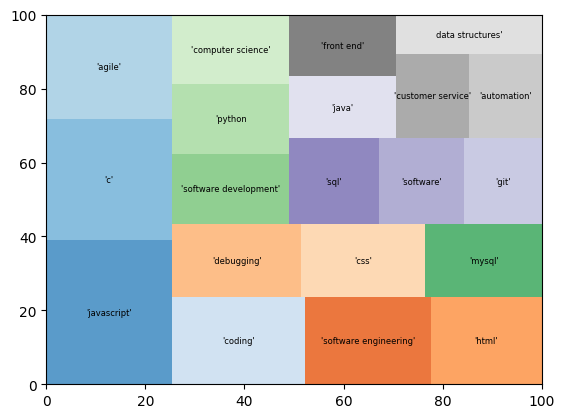

In [163]:
import squarify

skills = skill_df.head(20)
sizes = skills['Count']
labels = skills['Skill']

colors = plt.cm.tab20c(range(len(labels)))

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize':6})


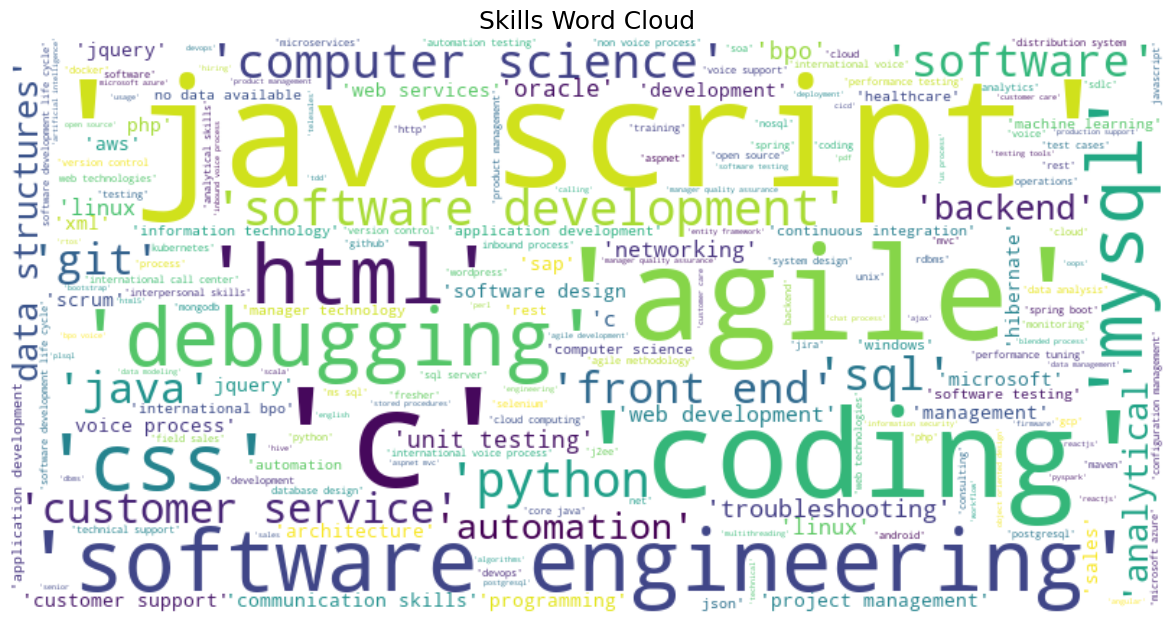

In [164]:
from wordcloud import WordCloud

word_freq = dict(zip(skill_df['Skill'], skill_df['Count']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud', fontsize=18)
plt.show()

Company Reviews Analysis 

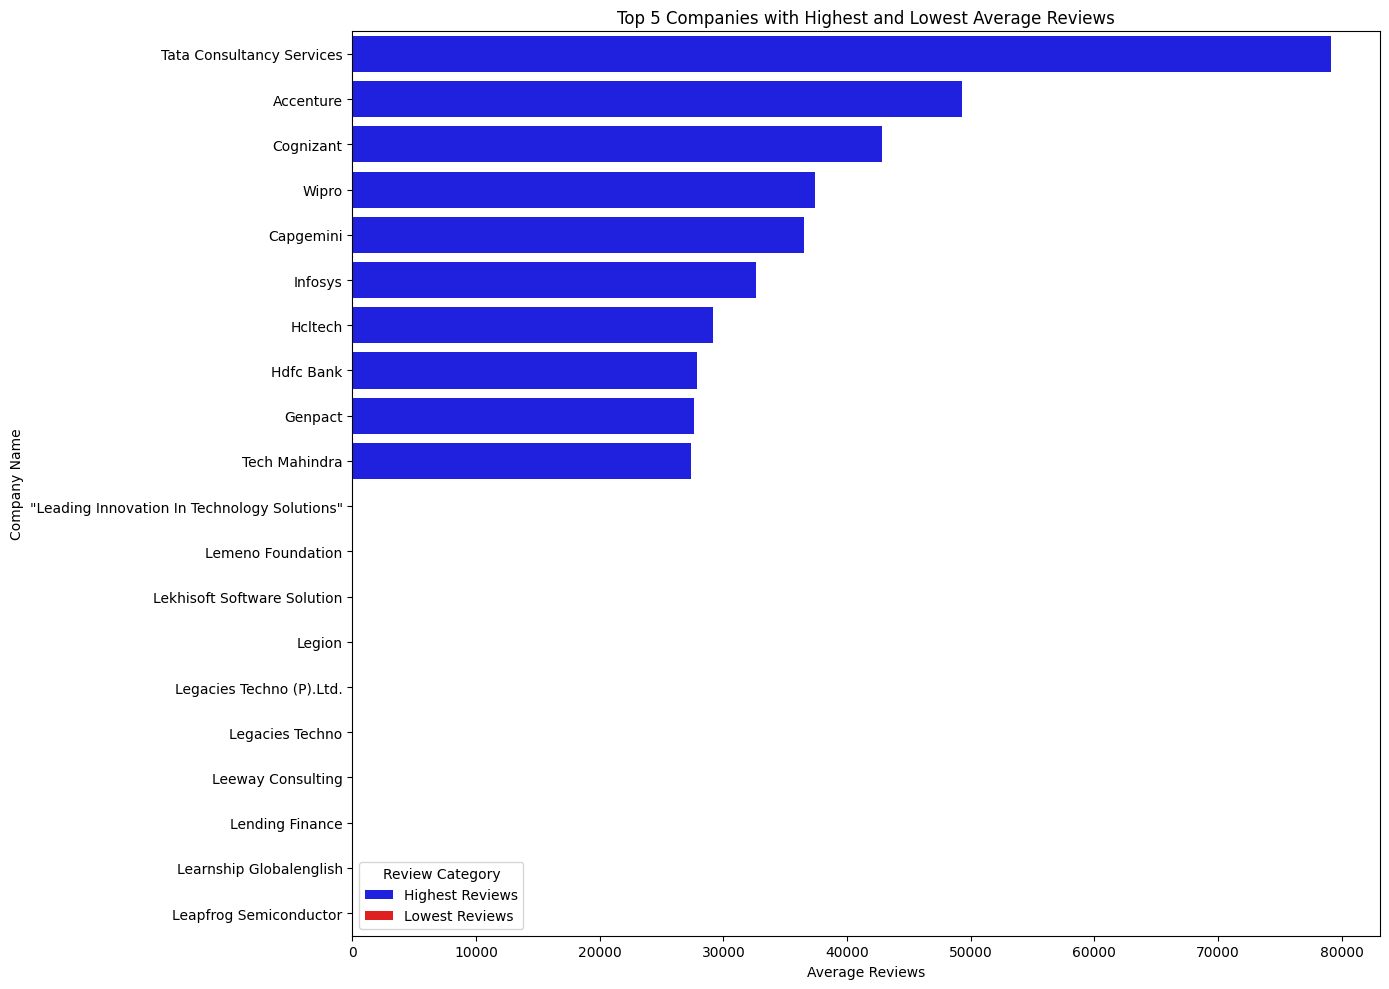

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_company_reviews(df):
    if 'Company Name' not in df.columns or 'Reviews' not in df.columns:
        raise ValueError("DataFrame must contain 'Company' and 'Reviews' columns")

    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

    df = df.dropna(subset=['Reviews'])

    avg_reviews = df.groupby('Company Name')['Reviews'].mean().reset_index()

    highest_reviews = avg_reviews.sort_values(by='Reviews', ascending=False).head(10)
    lowest_reviews = avg_reviews.sort_values(by='Reviews').head(10)

    return highest_reviews, lowest_reviews

def plot_horizontal_company_reviews(highest_df, lowest_df):
    plt.figure(figsize=(14, 10))

    combined_df = pd.concat([
        highest_df.assign(Category='Highest Reviews'),
        lowest_df.assign(Category='Lowest Reviews')
    ])

    sns.barplot(x='Reviews', y='Company Name', hue='Category', data=combined_df, palette={'Highest Reviews': 'b', 'Lowest Reviews': 'r'})
    plt.xlabel('Average Reviews')
    plt.ylabel('Company Name')
    plt.title('Top 5 Companies with Highest and Lowest Average Reviews')
    plt.legend(title='Review Category')
    plt.tight_layout()
    plt.show()

highest_reviews, lowest_reviews = analyze_company_reviews(df)

plot_horizontal_company_reviews(highest_reviews, lowest_reviews)



In [166]:
print(highest_reviews.head(10))

                   Company Name       Reviews
6995  Tata Consultancy Services  79140.083333
134                   Accenture  49264.797133
1608                  Cognizant  42856.763158
7964                      Wipro  37421.382353
1324                  Capgemini  36530.338462
3605                    Infosys  32598.128205
3158                    Hcltech  29149.352941
3162                  Hdfc Bank  27827.642857
2889                    Genpact  27591.000000
7022              Tech Mahindra  27353.030769


In [167]:
def wordcloud_job_titles():
        job_titles = ' '.join(df['Job Title'].tolist())
        wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(job_titles)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

def wordcloud_locations():
        locations = ' '.join(df['Location'].tolist())
        wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(locations)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

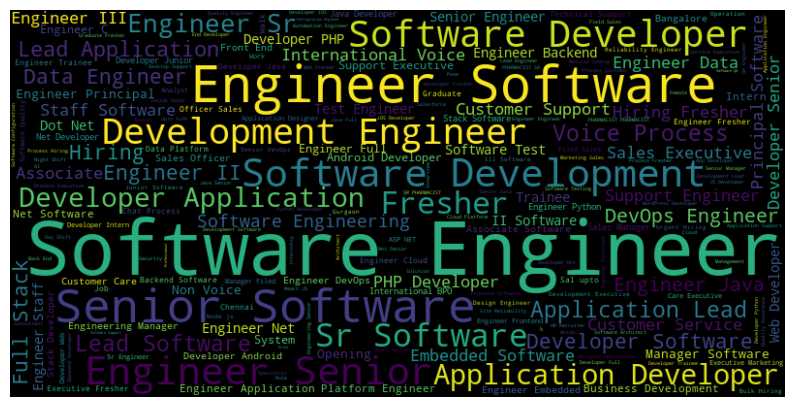

In [168]:
wordcloud_job_titles()

In [169]:
final_dataset = df.to_csv('../final_data.csv')